In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import scipy
import matplotlib.cm as cm
from datetime import datetime
import seaborn as sns
import pytz
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn import metrics

In [2]:
# Start loading in the data for Figure 3 

filename = 'LabeledData1'
filepath = os.path.join('Data', filename+'.csv')
tinycam1E = pd.read_csv(filepath, header = 0) #"E" for data labeled by Evan Goldstein
tinycam1E['datetime']=pd.to_datetime(tinycam1E["time"], unit='s')
tinycam1E['datetime'] = tinycam1E['datetime'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
tinycam1E['road'] = 0
tinycam1E = tinycam1E.fillna("TooDark")
tinycam1E.head()

,time,state,V,label,datetime,road
0,1731521526,NoFlood,9248,TooDark,2024-11-13 13:12:06,0
1,1731521887,NoFlood,9344,TooDark,2024-11-13 13:18:07,0
2,1731522247,NoFlood,9344,TooDark,2024-11-13 13:24:07,0
3,1731522606,NoFlood,9344,TooDark,2024-11-13 13:30:06,0
4,1731522967,NoFlood,9344,TooDark,2024-11-13 13:36:07,0


In [5]:
filename = 'LabeledData2'

filepath = os.path.join('Data', filename+'.csv')
tinycam2E = pd.read_csv(filepath, header = 0)
tinycam2E['datetime']=pd.to_datetime(tinycam2E["time"], unit='s')
tinycam2E['datetime'] = tinycam2E['datetime'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
tinycam2E['road'] = 0
tinycam2E = tinycam2E.fillna("TooDark")
tinycam2E.head()

,time,state,V,label,datetime,road
0,1731520806,NoFlood,9024,TooDark,2024-11-13 13:00:06,0
1,1731521167,NoFlood,9120,TooDark,2024-11-13 13:06:07,0
2,1731521526,NoFlood,9120,TooDark,2024-11-13 13:12:06,0
3,1731521887,NoFlood,9120,TooDark,2024-11-13 13:18:07,0
4,1731522246,NoFlood,9120,TooDark,2024-11-13 13:24:06,0


In [7]:
filename = 'LabeledData3'

filepath = os.path.join('Data', filename+'.csv')
tinycam3E = pd.read_csv(filepath, header = 0)
tinycam3E['datetime']=pd.to_datetime(tinycam3E["time"], unit='s')
tinycam3E['datetime'] = tinycam3E['datetime'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
tinycam3E['road'] = 0
tinycam3E = tinycam3E.fillna("TooDark")
tinycam3E.head()

,time,state,V,label,datetime,road
0,1731519726,NoFlood,9024,TooDark,2024-11-13 12:42:06,0
1,1731520087,NoFlood,9120,TooDark,2024-11-13 12:48:07,0
2,1731520446,Flood,9104,TooDark,2024-11-13 12:54:06,0
3,1731520807,Flood,9104,TooDark,2024-11-13 13:00:07,0
4,1731521166,Flood,9104,TooDark,2024-11-13 13:06:06,0


In [9]:
#note this is called TinyCam5 in this code but referred to as tinyCamML 4 in the manuscript 

filename = 'LabeledData5'

filepath = os.path.join('Data', filename+'.csv')
tinycam5E = pd.read_csv(filepath, header = 0)
tinycam5E['datetime']=pd.to_datetime(tinycam5E["time"], unit='s')
tinycam5E['datetime'] = tinycam5E['datetime'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
tinycam5E['road'] = 0
tinycam5E = tinycam5E.fillna("TooDark")
tinycam5E.head()

,time,state,V,label,datetime,road
0,1731518287,NoFlood,8944,TooDark,2024-11-13 12:18:07,0
1,1731518647,NoFlood,9120,TooDark,2024-11-13 12:24:07,0
2,1731519007,NoFlood,9120,TooDark,2024-11-13 12:30:07,0
3,1731519367,NoFlood,9120,TooDark,2024-11-13 12:36:07,0
4,1731519727,NoFlood,9120,TooDark,2024-11-13 12:42:07,0


In [11]:
# Loading in the Sunny Day Flood Sensors Data from data.sunnydayflood.com 
filename = 'CB01Datalog'
filepath = os.path.join('Data', filename+'.csv')
CB01 = pd.read_csv(filepath, header = 0, parse_dates = [0])
local_timezone = pytz.timezone('America/New_York')
#CB01['datetime'] = CB01['timestamp (UTC)'].dt.tz_localize('UTC').dt.tz_convert(local_timezone)
CB01['datetime'] = CB01['timestamp (UTC)'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
CB01['type'] = "TinyCamML1" #add which tinycamml was deployed at that location
CB01.head()
CB01.tail()

,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type
21772,2024-12-31 04:35:00,0.55,2.38,0.59,-1.79,2024-12-30 23:35:00,TinyCamML1
21773,2024-12-31 04:41:00,0.55,2.38,0.59,-1.79,2024-12-30 23:41:00,TinyCamML1
21774,2024-12-31 04:47:00,0.55,2.38,0.57,-1.81,2024-12-30 23:47:00,TinyCamML1
21775,2024-12-31 04:53:00,0.55,2.38,0.56,-1.82,2024-12-30 23:53:00,TinyCamML1
21776,2024-12-31 04:59:00,0.55,2.38,0.55,-1.83,2024-12-30 23:59:00,TinyCamML1


In [13]:
#convert from imperial to metric units 
CB01['water level m'] = CB01['water level (ft above or below road elev.)']*0.3048
CB01.head()

,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type,water level m
0,2024-10-01 04:04:00,0.55,2.38,0.80,-1.58,2024-09-30 23:04:00,TinyCamML1,-0.481584
1,2024-10-01 04:10:00,0.55,2.38,0.74,-1.64,2024-09-30 23:10:00,TinyCamML1,-0.499872
2,2024-10-01 04:16:00,0.55,2.38,0.68,-1.70,2024-09-30 23:16:00,TinyCamML1,-0.518160
3,2024-10-01 04:22:00,0.55,2.38,0.62,-1.76,2024-09-30 23:22:00,TinyCamML1,-0.536448
4,2024-10-01 04:28:00,0.55,2.38,0.62,-1.76,2024-09-30 23:28:00,TinyCamML1,-0.536448


In [15]:
#make another copy of CB01 data since tinycamml2 was deployed at same location as tinycamml1 
CB01y = CB01
CB01y['type'] = "TinyCamML2"
CB01y.head()

,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type,water level m
0,2024-10-01 04:04:00,0.55,2.38,0.80,-1.58,2024-09-30 23:04:00,TinyCamML2,-0.481584
1,2024-10-01 04:10:00,0.55,2.38,0.74,-1.64,2024-09-30 23:10:00,TinyCamML2,-0.499872
2,2024-10-01 04:16:00,0.55,2.38,0.68,-1.70,2024-09-30 23:16:00,TinyCamML2,-0.518160
3,2024-10-01 04:22:00,0.55,2.38,0.62,-1.76,2024-09-30 23:22:00,TinyCamML2,-0.536448
4,2024-10-01 04:28:00,0.55,2.38,0.62,-1.76,2024-09-30 23:28:00,TinyCamML2,-0.536448


In [17]:
filename = 'CB02Datalog'
filepath = os.path.join('Data', filename+'.csv')
CB02 = pd.read_csv(filepath, header = 0, parse_dates = [0])
local_timezone = pytz.timezone('America/New_York') 
#CB02['datetime'] = CB02['timestamp (UTC)'].dt.tz_localize('UTC').dt.tz_convert(local_timezone)
CB02['datetime'] = CB02['timestamp (UTC)'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
CB02['type'] = "TinyCamML3"
CB02.head()
CB02.tail()

,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type
22508,2024-12-31 04:32:00,0.75,2.39,0.87,-1.52,2024-12-30 23:32:00,TinyCamML3
22509,2024-12-31 04:38:00,0.75,2.39,0.87,-1.52,2024-12-30 23:38:00,TinyCamML3
22510,2024-12-31 04:44:00,0.75,2.39,0.86,-1.53,2024-12-30 23:44:00,TinyCamML3
22511,2024-12-31 04:50:00,0.75,2.39,0.86,-1.53,2024-12-30 23:50:00,TinyCamML3
22512,2024-12-31 04:56:00,0.75,2.39,0.85,-1.54,2024-12-30 23:56:00,TinyCamML3


In [19]:
CB02['water level m'] = CB02['water level (ft above or below road elev.)']*0.3048
CB02.head()

,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type,water level m
0,2024-10-02 16:59:00,0.75,2.39,0.76,-1.63,2024-10-02 11:59:00,TinyCamML3,-0.496824
1,2024-10-02 16:59:00,0.75,2.39,0.76,-1.63,2024-10-02 11:59:00,TinyCamML3,-0.496824
2,2024-10-02 17:00:00,0.75,2.39,0.75,-1.64,2024-10-02 12:00:00,TinyCamML3,-0.499872
3,2024-10-02 17:06:00,0.75,2.39,0.90,-1.49,2024-10-02 12:06:00,TinyCamML3,-0.454152
4,2024-10-02 17:12:00,0.75,2.39,0.87,-1.52,2024-10-02 12:12:00,TinyCamML3,-0.463296


In [21]:
filename = 'CB03Datalog'
filepath = os.path.join('Data', filename+'.csv')
CB03 = pd.read_csv(filepath, header = 0, parse_dates = [0])
local_timezone = pytz.timezone('America/New_York')
#CB03['datetime'] = CB03['timestamp (UTC)'].dt.tz_localize('UTC').dt.tz_convert(local_timezone)
CB03['datetime'] = CB03['timestamp (UTC)'] - pd.Timedelta(hours=5, minutes=0, seconds=0)
CB03['type'] = "TinyCamML5"
CB03.head()


,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type
0,2024-10-01 04:03:00,1.22,3.05,1.31,-1.74,2024-09-30 23:03:00,TinyCamML5
1,2024-10-01 04:09:00,1.22,3.05,1.32,-1.73,2024-09-30 23:09:00,TinyCamML5
2,2024-10-01 04:15:00,1.22,3.05,1.32,-1.73,2024-09-30 23:15:00,TinyCamML5
3,2024-10-01 04:21:00,1.22,3.05,1.31,-1.74,2024-09-30 23:21:00,TinyCamML5
4,2024-10-01 04:27:00,1.22,3.05,1.31,-1.74,2024-09-30 23:27:00,TinyCamML5


In [23]:
CB03['water level m'] = CB03['water level (ft above or below road elev.)']*0.3048
CB03.head()

,timestamp (UTC),sensor elev. (ft NAVD88),road elev. (ft NAVD88),water level (ft NAVD88),water level (ft above or below road elev.),datetime,type,water level m
0,2024-10-01 04:03:00,1.22,3.05,1.31,-1.74,2024-09-30 23:03:00,TinyCamML5,-0.530352
1,2024-10-01 04:09:00,1.22,3.05,1.32,-1.73,2024-09-30 23:09:00,TinyCamML5,-0.527304
2,2024-10-01 04:15:00,1.22,3.05,1.32,-1.73,2024-09-30 23:15:00,TinyCamML5,-0.527304
3,2024-10-01 04:21:00,1.22,3.05,1.31,-1.74,2024-09-30 23:21:00,TinyCamML5,-0.530352
4,2024-10-01 04:27:00,1.22,3.05,1.31,-1.74,2024-09-30 23:27:00,TinyCamML5,-0.530352


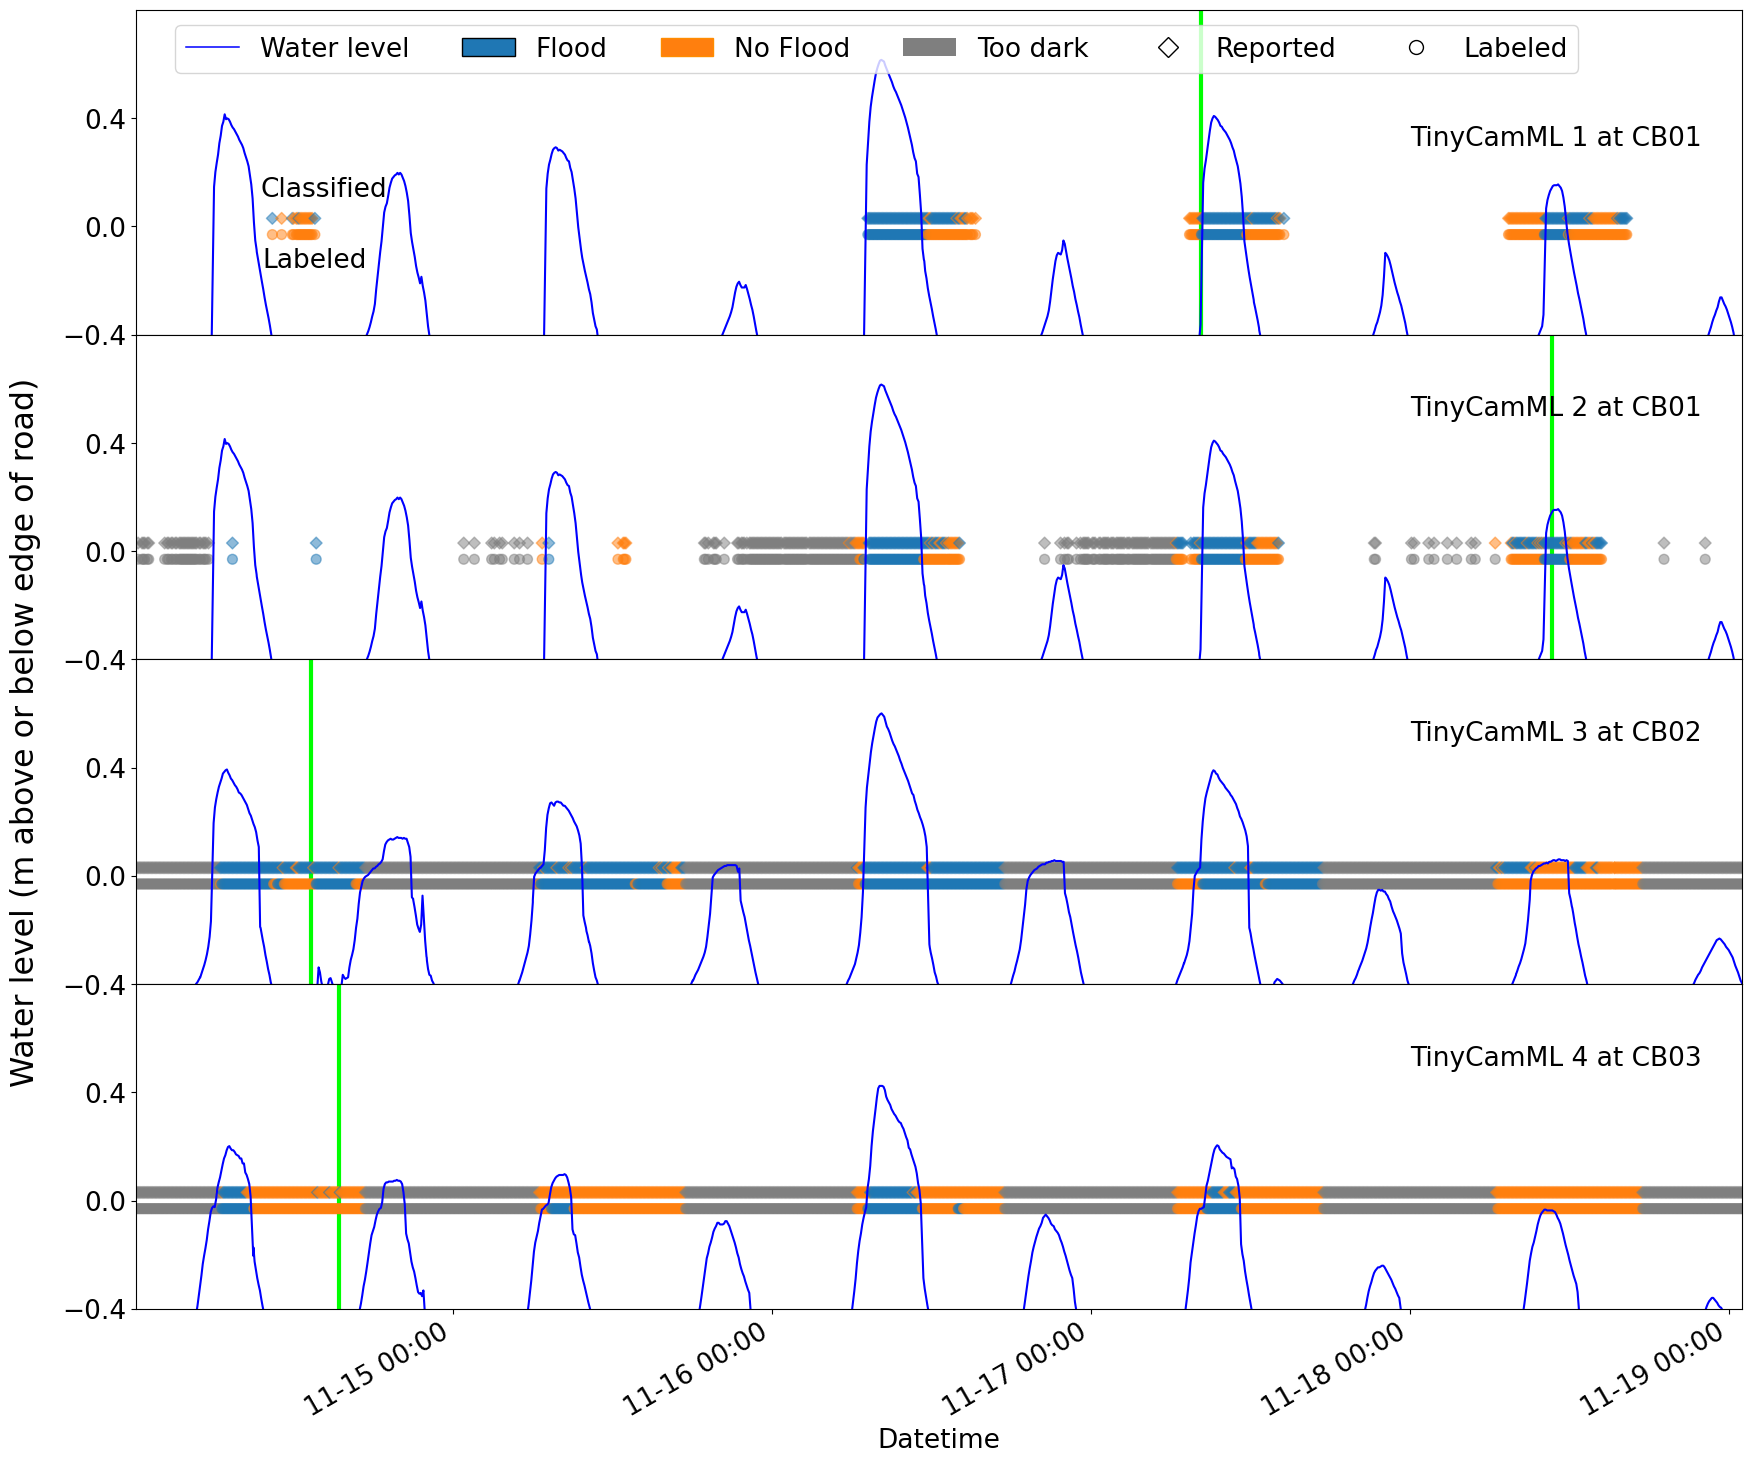

In [25]:
# Figure 3 
plt.rcParams.update({'font.size': 19})
fig, axs = plt.subplots(4, sharex=True, sharey = True, figsize = (18, 15))
colors = {'Flood':'tab:blue', 'NoFlood':'tab:orange', 'TooDark':'tab:gray'}


legend_elements = [Line2D([0], [0], color='blue', lw=1.1, label='Water level'),
                   Patch(facecolor='tab:blue', edgecolor = 'black', label='Flood'),
                   Patch(facecolor='tab:orange', edgecolor = 'darkorange', label='No Flood'),
                   Patch(facecolor='tab:gray', label='Too dark'), 
                   Line2D([0], [0], marker='D', markersize=10, color= 'None', markeredgecolor='black', linestyle='None', label='Reported'),
                   Line2D([0], [0], marker='o', markersize=10, color= 'None', markeredgecolor='black', linestyle='None', label='Labeled')]
   
axs[0].axvline(pd.Timestamp('2024-11-17 08:18:00'), lw= 3, color = "lime", zorder=0)
axs[1].axvline(pd.Timestamp('2024-11-18 10:42:00'), lw= 3, color = "lime", zorder=0)
axs[2].axvline(pd.Timestamp('2024-11-14 13:18:00'), lw= 3, color = "lime", zorder=0)
axs[3].axvline(pd.Timestamp('2024-11-14 15:24:00'), lw= 3, color = "lime", zorder=0)

axs[0].plot(CB01["datetime"], CB01["water level m"], color = "blue")
axs[0].scatter(tinycam1E["datetime"], tinycam1E["road"]+0.03, c = tinycam1E["state"].map(colors), marker = "D", alpha = 0.5)
axs[0].scatter(tinycam1E["datetime"], tinycam1E["road"]-0.03, c = tinycam1E["label"].map(colors), marker = "o", alpha = 0.5, s=50)
#axs[0].plot(pd.Timestamp('2024-11-17 08:18:00'), 0, '*', color = 'lime', markeredgecolor = "green", markersize =9)

axs[1].scatter(tinycam2E["datetime"], tinycam2E["road"]+0.03, c = tinycam2E["state"].map(colors), marker = "D",alpha = 0.5)
axs[1].scatter(tinycam2E["datetime"], tinycam2E["road"]-0.03, c = tinycam2E["label"].map(colors), marker = "o",alpha = 0.5, s=50)
axs[1].plot(CB01["datetime"], CB01["water level m"], color = "blue")
#axs[1].plot(pd.Timestamp('2024-11-18 10:42:00'), 0, '*', color = 'lime', markeredgecolor = "green", markersize =9)

axs[2].scatter(tinycam3E["datetime"], tinycam3E["road"]+0.03, c = tinycam3E["state"].map(colors), marker = "D",alpha = 0.5)
axs[2].scatter(tinycam3E["datetime"], tinycam3E["road"]-0.03, c = tinycam3E["label"].map(colors), marker = "o",alpha = 0.5, s=50)
axs[2].plot(CB02["datetime"], CB02["water level m"], color = "blue")
#axs[2].plot(pd.Timestamp('2024-11-14 10:12:00'), 0, '*', color = 'lime', markeredgecolor = "green", markersize =9)

axs[3].scatter(tinycam5E["datetime"], tinycam5E["road"]+0.03, c = tinycam5E["state"].map(colors), marker = "D",alpha = 0.5)
axs[3].scatter(tinycam5E["datetime"], tinycam5E["road"]-0.03, c = tinycam5E["label"].map(colors), marker = "o",alpha = 0.5, s=50)
axs[3].plot(CB03["datetime"], CB03["water level m"], color = "blue")
#axs[3].plot(pd.Timestamp('2024-11-14 15:24:00'), 0, '*', color = 'lime', markeredgecolor = "green", markersize =9)

fig.autofmt_xdate()
date_form = DateFormatter("%m-%d %H:%M")
axs[0].xaxis.set_major_formatter(date_form)
axs[1].xaxis.set_major_formatter(date_form)
axs[2].xaxis.set_major_formatter(date_form)
axs[0].set_xlim(pd.Timestamp('2024-11-14 00:08:00'), pd.Timestamp('2024-11-19 01:00:00'))
axs[1].set_xlim(pd.Timestamp('2024-11-14 00:08:00'), pd.Timestamp('2024-11-19 01:00:00'))
axs[2].set_xlim(pd.Timestamp('2024-11-14 00:08:00'), pd.Timestamp('2024-11-19 01:00:00'))
axs[3].set_xlim(pd.Timestamp('2024-11-14 00:08:00'), pd.Timestamp('2024-11-19 01:00:00'))
axs[0].set_ylim(-0.4,0.8)
axs[1].set_ylim(-0.4,0.8)
axs[2].set_ylim(-0.4,0.8)
axs[3].set_ylim(-0.4,0.8)

axs[0].set_yticks(np.arange(-0.4, 0.78, 0.4))
axs[0].text(pd.Timestamp('2024-11-18 00:00:00'), .3, 'TinyCamML 1 at CB01')
axs[1].text(pd.Timestamp('2024-11-18 00:00:00'), .5, 'TinyCamML 2 at CB01')
axs[2].text(pd.Timestamp('2024-11-18 00:00:00'), .5, 'TinyCamML 3 at CB02')
axs[3].text(pd.Timestamp('2024-11-18 00:00:00'), .5, 'TinyCamML 4 at CB03')
axs[0].text(pd.Timestamp('2024-11-14 09:30:00'), 0.11, 'Classified')
axs[0].text(pd.Timestamp('2024-11-14 09:40:00'), -0.15, 'Labeled')



plt.xlabel('Datetime')
fig.supylabel('Water level (m above or below edge of road)')
plt.tight_layout()
fig.legend(loc=(0.1,0.95), handles=legend_elements, ncol=6)
fig.subplots_adjust(wspace=0, hspace=0)
plt.margins(x=0)


fig_fn = 'Figure3'
fig_file = os.path.join('Figures', fig_fn+'.png')
#plt.savefig(fig_file, dpi = 300, transparent=False)


In [27]:
# Start loading in data for Figure 4, confusion matrix 

#remove the "too dark" imagery from the analysis 
tinycam1E2 = tinycam1E[~(tinycam1E['state'] == "TooDark")]
tinycam1E2 = tinycam1E[~(tinycam1E['label'] == "TooDark")]
tinycam2E2 = tinycam2E[~(tinycam2E['state'] == "TooDark")]
tinycam2E2 = tinycam2E[~(tinycam2E['label'] == "TooDark")]
tinycam3E2 = tinycam3E[~(tinycam3E['state'] == "TooDark")]
tinycam3E2 = tinycam3E[~(tinycam3E['label'] == "TooDark")]
tinycam5E2 = tinycam5E[~(tinycam5E['state'] == "TooDark")]
tinycam5E2 = tinycam5E[~(tinycam5E['label'] == "TooDark")]

tinycam1E2["ID"] = "tinycam1" 
tinycam2E2["ID"] = "tinycam2"
tinycam3E2["ID"] = "tinycam3"
tinycam5E2["ID"] = "tinycam4" #referred to as tinycamml4 in the manuscript 

all = pd.concat([tinycam1E2, tinycam2E2, tinycam3E2, tinycam5E2], axis=0) #create new data frame with all outputs 

all.head() #error is produced but it's ignorable

C:\Users\efarquh\AppData\Local\Temp\ipykernel_20876\2024485680.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinycam1E2["ID"] = "tinycam1"
C:\Users\efarquh\AppData\Local\Temp\ipykernel_20876\2024485680.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinycam2E2["ID"] = "tinycam2"
C:\Users\efarquh\AppData\Local\Temp\ipykernel_20876\2024485680.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,time,state,V,label,datetime,road,ID
9,1731597847,Flood,9360,NoFlood,2024-11-14 10:24:07,0,tinycam1
10,1731600366,NoFlood,9408,NoFlood,2024-11-14 11:06:06,0,tinycam1
11,1731603246,Flood,9392,NoFlood,2024-11-14 11:54:06,0,tinycam1
12,1731603607,NoFlood,9408,NoFlood,2024-11-14 12:00:07,0,tinycam1
13,1731604327,NoFlood,9408,NoFlood,2024-11-14 12:12:07,0,tinycam1


<Figure size 2000x2000 with 0 Axes>

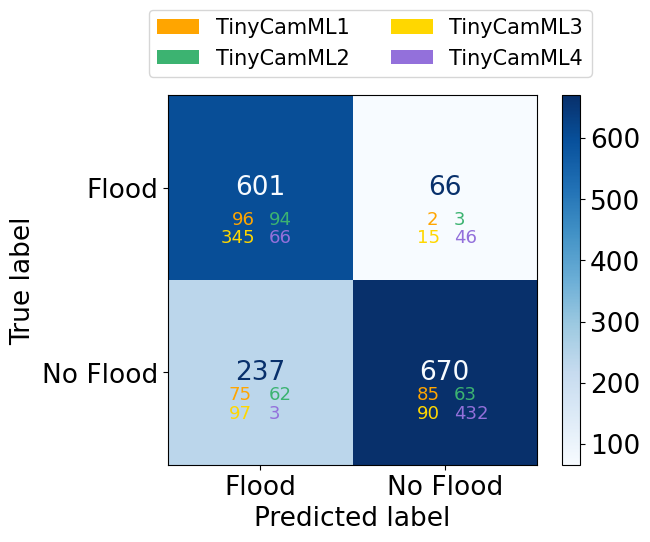

In [31]:
predicted = all["state"]
actual = all["label"]
plt.rcParams.update({'font.size': 19})
plt.figure(figsize=(20, 20))

legend_elements = [Patch(facecolor='orange', label='TinyCamML1'),
                   Patch(facecolor='mediumseagreen', label='TinyCamML2'),
                   Patch(facecolor='gold', label='TinyCamML3'), 
                   Patch(facecolor='mediumpurple', label='TinyCamML4')]


confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ("Flood", "No Flood"))
cm_display.plot(cmap = "Blues")
plt.text(-0.15,0.20, "96", fontsize=13, color = "orange")
plt.text(0.05,0.20, "94", fontsize=13, color = "mediumseagreen")
plt.text(-0.21,0.30, "345", fontsize=13, color = "gold")
plt.text(0.05,0.30, "66", fontsize=13, color = "mediumpurple")

plt.text(0.90,0.20, "2", fontsize=13, color = "orange")
plt.text(1.05,0.20, "3", fontsize=13, color = "mediumseagreen")
plt.text(0.85,0.30, "15", fontsize=13, color = "gold")
plt.text(1.05,0.30, "46", fontsize=13, color = "mediumpurple")

plt.text(-0.17,1.15, "75", fontsize=13, color = "orange")
plt.text(0.05,1.15, "62", fontsize=13, color = "mediumseagreen")
plt.text(-0.17,1.25, "97", fontsize=13, color = "gold")
plt.text(0.05,1.25, "3", fontsize=13, color = "mediumpurple")

plt.text(0.85,1.15, "85", fontsize=13, color = "orange")
plt.text(1.05,1.15, "63", fontsize=13, color = "mediumseagreen")
plt.text(0.85,1.25, "90", fontsize=13, color = "gold")
plt.text(1.05,1.25, "432", fontsize=13, color = "mediumpurple")

plt.legend(loc=(-0.05,1.05), handles=legend_elements, ncol = 2, fontsize = 15)


fig_fn = 'Figure4'
fig_file = os.path.join('Figures', fig_fn+'.png')
#plt.savefig(fig_file, dpi = 300, transparent=False, bbox_inches='tight')

In [33]:
## just some code for ensuring the numbers produced above in the confusion matrix match what is intended 
# number of rows in test_subset should correspond to the little numbers in confusion matrix 
test_subset = tinycam3E2[(tinycam3E2["state"]=="Flood") & (tinycam3E2["label"]=="Flood")]
print(test_subset)

            time  state     V  label            datetime  road        ID
179   1731584166  Flood  9200  Flood 2024-11-14 06:36:06     0  tinycam3
180   1731584527  Flood  9200  Flood 2024-11-14 06:42:07     0  tinycam3
181   1731584886  Flood  9200  Flood 2024-11-14 06:48:06     0  tinycam3
182   1731585246  Flood  9200  Flood 2024-11-14 06:54:06     0  tinycam3
183   1731585606  Flood  9200  Flood 2024-11-14 07:00:06     0  tinycam3
...          ...    ...   ...    ...                 ...   ...       ...
1002  1731880446  Flood  9392  Flood 2024-11-17 16:54:06     0  tinycam3
1003  1731880806  Flood  9392  Flood 2024-11-17 17:00:06     0  tinycam3
1004  1731881167  Flood  9392  Flood 2024-11-17 17:06:07     0  tinycam3
1005  1731881527  Flood  9392  Flood 2024-11-17 17:12:07     0  tinycam3
1006  1731881886  Flood  9392  Flood 2024-11-17 17:18:06     0  tinycam3

[345 rows x 7 columns]
